# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#for city in cities:
    #query_url+format(cities)
  # print("http://api.openweathermap.org?appid=169614e34427afdb73cdb18162b42982&q={}".format(city))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        city_record=response["name"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record} | {city_record}")
        record=record+1
    except:        
        print(f"City not found. Skipping")
    continue        

City not found. Skipping
City not found. Skipping
Processing Record 1 | Port Blair
Processing Record 2 | Punta Arenas
Processing Record 3 | Jamestown
Processing Record 4 | Poyarkovo
Processing Record 5 | Pevek
City not found. Skipping
Processing Record 6 | Chuy
Processing Record 7 | Havelock
Processing Record 8 | Te Anau
Processing Record 9 | Ushuaia
Processing Record 10 | San Cristobal
Processing Record 11 | Dukat
Processing Record 12 | Kodiak
Processing Record 13 | Puerto Ayora
Processing Record 14 | Port Elizabeth
Processing Record 15 | Bandarbeyla
Processing Record 16 | Jardim
Processing Record 17 | Busselton
Processing Record 18 | Seoul
Processing Record 19 | Albany
Processing Record 20 | Tasiilaq
City not found. Skipping
Processing Record 21 | Darhan
Processing Record 22 | Mayo
Processing Record 23 | Geraldton
Processing Record 24 | Grand Gaube
Processing Record 25 | Butaritari
Processing Record 26 | Hoima
City not found. Skipping
Processing Record 27 | Beloha
Processing Record 2

Processing Record 225 | Novobirilyussy
Processing Record 226 | Cockburn Town
Processing Record 227 | Saint-Pierre
Processing Record 228 | Roald
Processing Record 229 | Mar del Plata
Processing Record 230 | Hami
Processing Record 231 | Namatanai
Processing Record 232 | Saldanha
Processing Record 233 | Itoman
Processing Record 234 | Novoselitskoye
Processing Record 235 | Aberdeen
Processing Record 236 | Freeport
Processing Record 237 | Bambanglipuro
Processing Record 238 | Portland
Processing Record 239 | Provideniya
Processing Record 240 | Selma
Processing Record 241 | Fort Morgan
Processing Record 242 | Russkiy Kameshkir
Processing Record 243 | Vao
Processing Record 244 | Zhuhai
Processing Record 245 | Lavumisa
Processing Record 246 | Alekseyevsk
Processing Record 247 | Bestobe
Processing Record 248 | Vigrestad
Processing Record 249 | Saint-Augustin
Processing Record 250 | Yuanping
Processing Record 251 | Nicoya
Processing Record 252 | Beringovskiy
Processing Record 253 | Maceio
Proces

Processing Record 452 | Brasilia de Minas
Processing Record 453 | Palora
Processing Record 454 | Nieuw Nickerie
Processing Record 455 | Jiangyou
Processing Record 456 | Chinhoyi
Processing Record 457 | Swift Current
Processing Record 458 | Sinnamary
Processing Record 459 | Chitrakonda
Processing Record 460 | Nouadhibou
Processing Record 461 | Akdepe
Processing Record 462 | Acapulco
Processing Record 463 | Port Augusta
Processing Record 464 | Ola
Processing Record 465 | Verkh-Chebula
Processing Record 466 | Hinesburg
Processing Record 467 | Wallacetown
City not found. Skipping
City not found. Skipping
Processing Record 468 | Poddorye
Processing Record 469 | Taunggyi
Processing Record 470 | Kirakira
Processing Record 471 | Namibe
Processing Record 472 | Numan
City not found. Skipping
Processing Record 473 | Sterlitamak
Processing Record 474 | Vaitape
Processing Record 475 | Goderich
Processing Record 476 | Miraflores
Processing Record 477 | Basco
Processing Record 478 | Noumea
Processing

In [9]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()


City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [10]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weather_output.csv", encoding="utf-8", index=False)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Blair,100,IN,1561403120,77,11.67,92.75,82.52,8.77
1,Punta Arenas,75,CL,1561403360,69,-53.16,-70.91,37.40,21.92
2,Jamestown,100,AU,1561403364,63,-33.21,138.60,44.00,6.31
3,Poyarkovo,100,RU,1561403805,96,49.62,128.65,59.12,11.97
4,Pevek,5,RU,1561403364,70,69.70,170.27,38.24,9.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

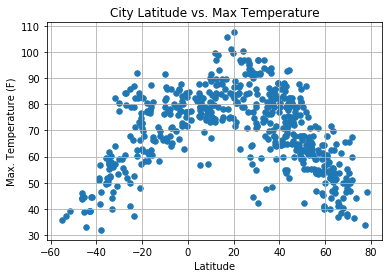

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

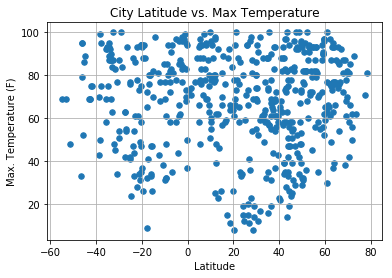

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

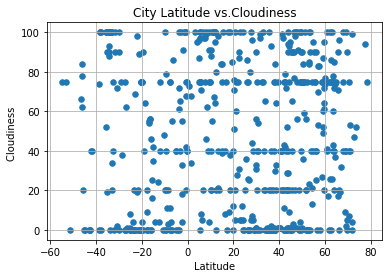

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs.Cloudiness")
plt.ylabel("Cloudiness ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

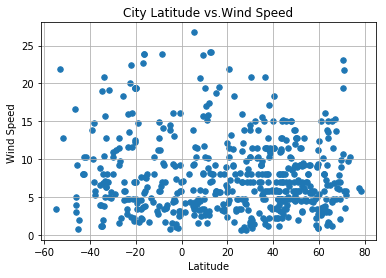

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Wind Speed.png")

# Show plot
plt.show()